#  PHYSICAL MODELS OF LIVING SYSTEMS


## Homework - week 7


Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------------------

Calculate the avalanche duration probability $P_{>}(t)$ if $λ_i = λ$ for all t and all neurons. This leads, as only sketched in class, to the following integral: 
$$P_{>}(t) =  \gamma \int_0^\infty d\lambda e^{-\gamma\lambda} (1-e^{-\delta\lambda} )^n$$
which can be solved through the saddle point approximation.


Optional. Create a time series λ(t), with t=1,2,...,T where at each time t, the value of λ is extracted from an exponential distribution. Then simulate N=100 independent heterogeneous Poisson processes, where each one describes the spikes events of a single neuron, but all have the same time dependent rate parameter λ(t).

-------------------------------------------------------------------------------------------------------------------------



The saddle-point method: Laplace’s method and the method of stationary phase are just two instances of a general
procedure known as the saddle-point method. Here we are concerned with an integral in the
complex plane of the form:

$$ I(s) = \int_a^b g(x) e^{s f(x)} dx  \approx  \frac{(2\pi)^{\frac{1}{2}}g (x_c) e^{sf(x_c)}}{|sf^{''}(x_c)|^{\frac{1}{2}}}  $$


Avalanche duration probability: 
$$P_{>}(t) =  \gamma \int_0^\infty d\lambda \cdot e^{-\gamma\lambda} (1-e^{-\delta\lambda}\big )^n$$

We have: 
$$P_>(t | \lambda_1 , \dots , \lambda_n) = \prod_{i=1}^{n} \big[ 1 - (1 - \lambda_i \cdot dt)^N \big]$$
where $N$ is the number of neurons and $n = \dfrac{t}{dt}$ is the number of spikes at time $t$ in the time bins.

Let: $ Q(\lambda) = \gamma \cdot e^{- \gamma \cdot \lambda}$ we marginalizing the rates $\lambda_i$ we obtain:

$$P_>(t) = \int_0^\infty \bigg[ \prod_{i=1}^{n} d\lambda \quad Q(\lambda) \bigg] \cdot P_>(t | \lambda_1 , \dots , \lambda_n)$$

The avalanche duration probability will become: 

$$P_>(t) = \int_0^\infty d\lambda \quad Q(\lambda) \cdot \big[ 1 - (1 - \lambda \cdot dt)^N \big]^n$$

$$ = \int_0^\infty d\lambda \quad Q(\lambda) (1-e^{-\lambda N dt}\big)^n $$

$$ = \int_0^\infty d\lambda \quad Q(\lambda) (1-e^{-\lambda \alpha}\big)^n $$

$$ = \gamma \int_0^\infty d\lambda \cdot exp (-\gamma \lambda + n  \cdot log(1-e^{-\lambda \alpha})\big) $$

Let consider $n \cdot f(\lambda) = -\gamma \lambda + n \cdot log(1-e^{-\lambda \alpha}) $

Use the saddle point approximation, we get:
    
$$  f(\lambda) = - \frac{\gamma \cdot \lambda}{n}  +  log(1-e^{-\lambda \alpha}) $$

Take the derivative of function $f(\lambda)$ and set to zero, we get: 

$$  f'(\lambda) = - \frac{\gamma}{n}  +  \frac{\alpha}{e^{\lambda \alpha} -1}  = 0  \rightarrow \tilde{\lambda} = \dfrac{1}{\alpha} \cdot log \bigg( \dfrac{n \alpha}{\gamma} + 1\bigg)   $$

$$ \rightarrow f(\tilde{\lambda}) = -\dfrac{\gamma}{n \alpha} \cdot log \big( \dfrac{n \alpha}{\gamma} + 1\big) + log \big[ 1 - \big(\dfrac{n \alpha}{\gamma} + 1 \big)^{-1} \big] $$

 where $\tilde{\lambda}$ is the critical value
 
 Take the second derivation of funtion $f(\lambda)$  to find the curvature of the function evaluating it at the critical point:
 


$$ f''(\lambda) = -\dfrac{\alpha^2 \cdot e^{\lambda \alpha}}{(e^{\lambda \alpha} - 1)^2} \rightarrow  f''(\tilde{\lambda}) = -\dfrac{\alpha^2 \cdot \bigg(1 + \dfrac{n \alpha}{\gamma}\bigg)}{\bigg(\dfrac{n \alpha}{\gamma}\bigg)^2} < 0$$ 

The function $f(\lambda)$ can be expanded as: 

$$f(\lambda) \approx f(\tilde{\lambda}) + \frac{1}{2}f''(\tilde{\lambda}) (\lambda - \tilde{\lambda})^2 + o\big[(\lambda - \tilde{\lambda})^3 \big]$$

Apply back to $P_>(t)$, we get: 

$$ P_>(t) = \gamma \cdot \int_0^\infty d\lambda \quad e^{ n \cdot f(\tilde{\lambda})} \cdot e^{ \frac{n}{2} \cdot f''(\tilde{\lambda})(\lambda - \tilde{\lambda})^2} $$

Apply $f(\tilde{\lambda})$ and $f''(\tilde{\lambda})$ to $ P_>(t)$, we get: 

$$ P_>(t) = \sqrt{{2 \pi}} \cdot \bigg( 1 + \dfrac{N \cdot t}{\gamma} \bigg)^{-\frac{\gamma}{\alpha}} \cdot \bigg[ \dfrac{N \cdot t}{\gamma + N \cdot t} \bigg]^{\frac{N \cdot t}{\alpha}} \cdot \sqrt{\cfrac{N \cdot t}{\alpha} \cdot \dfrac{1}{\big(1 + \frac{N \cdot t}{\gamma}\big)}} $$

-------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
T = 100           # time 
N = 100          # number  of neurons
lambda_x = 2     # lambda parameter

# Generate the time series lambda(t)
lambda_t = np.random.exponential(scale = (1/lambda_x), size=T)

spike_counts = np.zeros((N, T))

# Generate the spike counts for each neuron
for i in range(N):
    for t in range(T):
        spike_counts[i, t] = np.random.poisson(lam = lambda_t[t], size=None)

(0.0, 100.0)

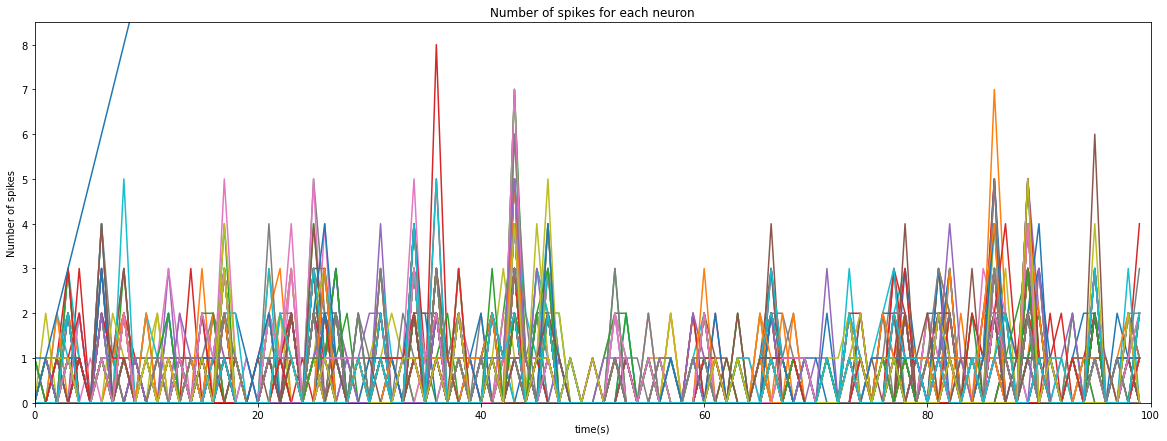

In [12]:
df_spikes = pd.DataFrame([])

df_spikes = pd.concat([pd.DataFrame(spike_counts[i, :]) for i in range(N)], axis=1)
df_spikes.columns = [f'Neuron_{i}' for i in range(N)]
  
df_spikes['t[s]'] = np.arange(0,T,1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
ax.plot(df_spikes)
ax.set_title('Number of spikes for each neuron')
ax.set_xlabel('time(s)')
ax.set_ylabel('Number of spikes')
ax.set_ylim(0,8.5)
ax.set_xlim(0,100)